<a href="https://colab.research.google.com/github/vinhbui123/machine_learning/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [77]:
import pandas as pd
import numpy as np
import os

from prettytable import PrettyTable

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.datasets import load_iris

import itertools

from prettytable import PrettyTable

Task 1. The Iris dataset includes the following attributes:

1.1. Visualizes different species of the Iris dataset based on each combination
between features (i.e., sepal length (cm) vs sepal width (cm), sepal length
(cm) vs petal length (cm), ...)

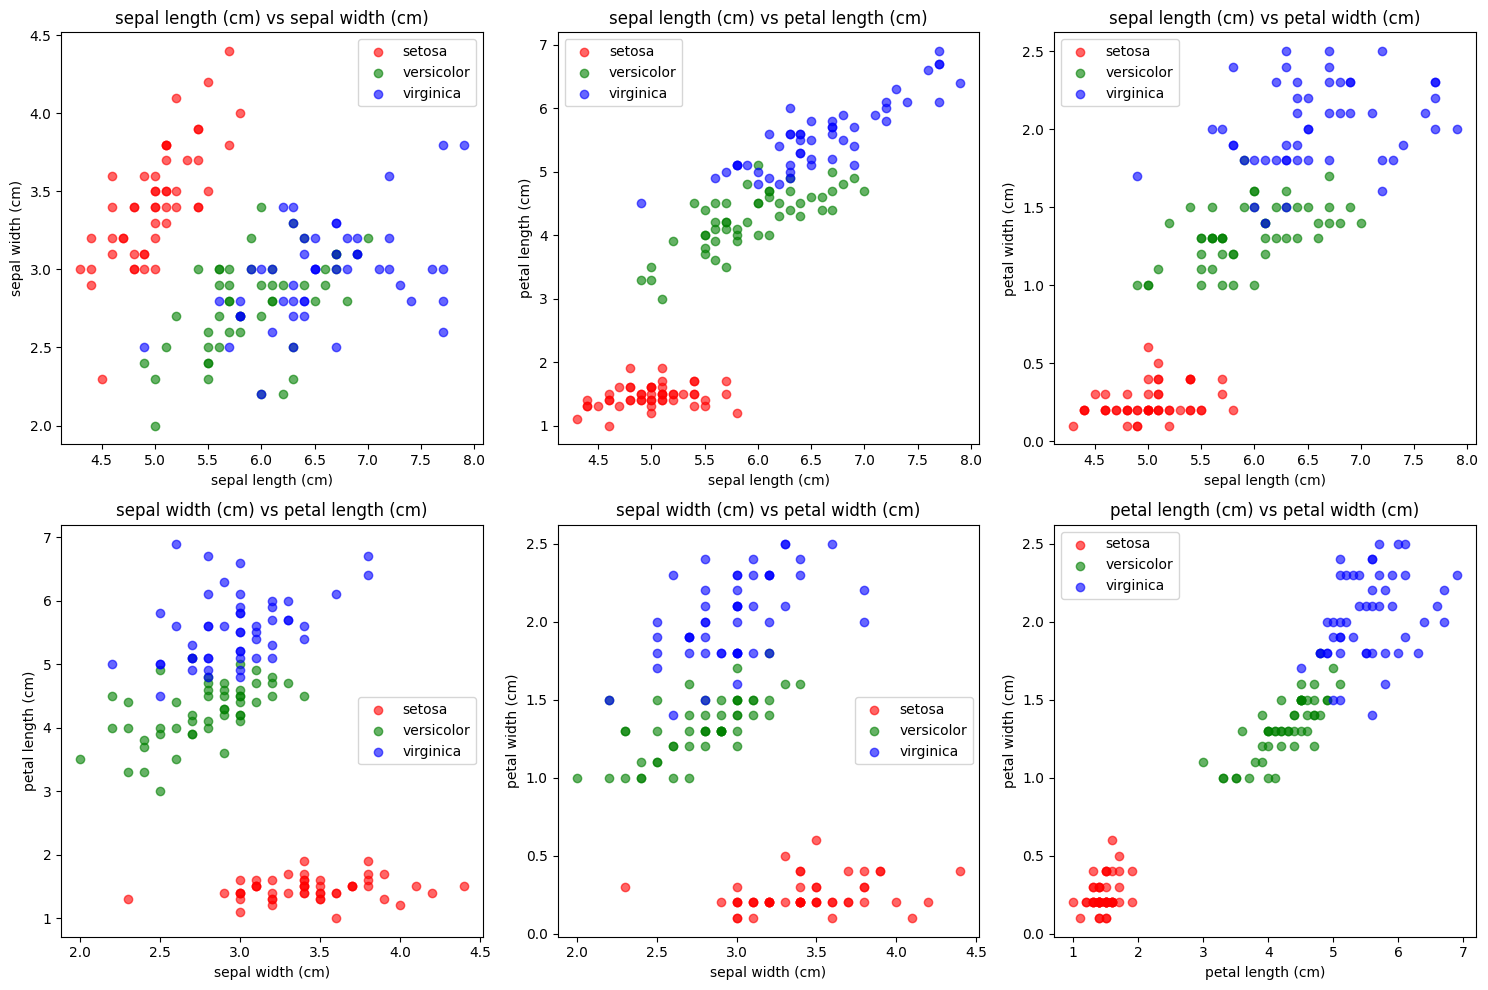

In [50]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

species = iris.target_names
df['species'] = df['species'].apply(lambda x: species[x])

colors = ['red', 'green', 'blue']
features = iris.feature_names

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (feature1, feature2) in enumerate(itertools.combinations(features, 2)):
    for species_idx, color in enumerate(colors):
        species_data = df[df['species'] == species[species_idx]]
        axes[i].scatter(species_data[feature1], species_data[feature2],
                        color=color, label=species[species_idx], alpha=0.6)

    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)
    axes[i].legend()
    axes[i].set_title(f"{feature1} vs {feature2}")

plt.tight_layout()
plt.show()

1.2. Visualize the proportion of each Iris species in the dataset using a Pie chart.

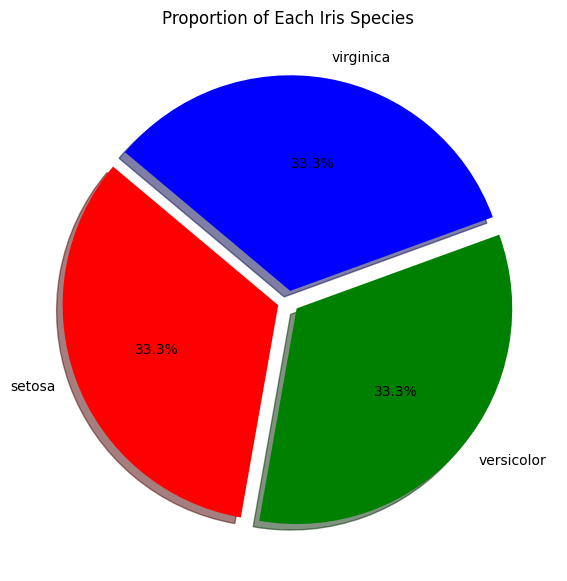

In [43]:
iris = load_iris(as_frame=True)
df = iris.data
df['species'] = iris.target

df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

species_counts = df['species'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%',
        colors=['red', 'green', 'blue'], startangle=140, shadow=True, explode=(0.05, 0.05, 0.05))

plt.title("Proportion of Each Iris Species")
plt.show()

1.3. Build a Decision Tree model

Decision Tree Accuracy: 0.9333333333333333


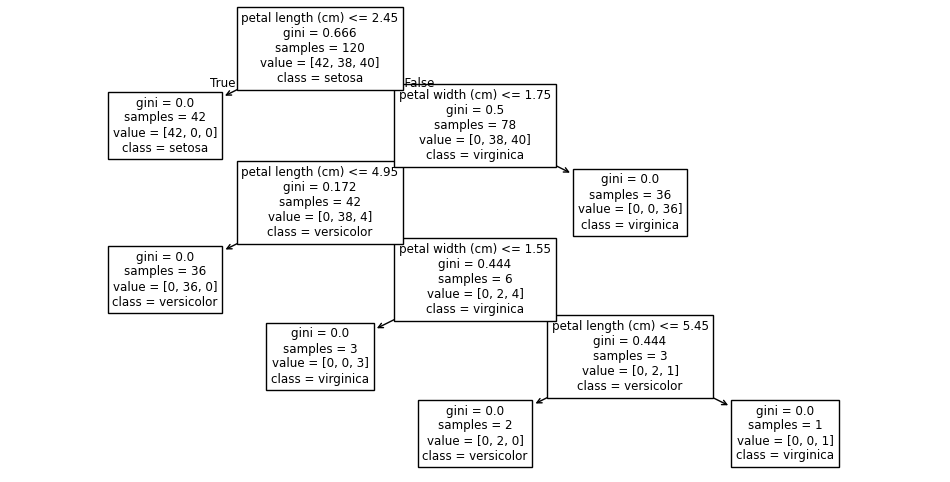

In [44]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=False)
plt.show()

1.4. Build a Logistic Regression model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9


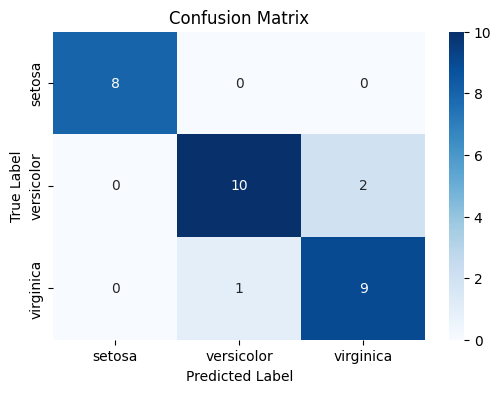

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1.5. Build kNN models with k={3, 5, ..., 29}. Then, plot the performance of
models with different values of k and select the best value of k.

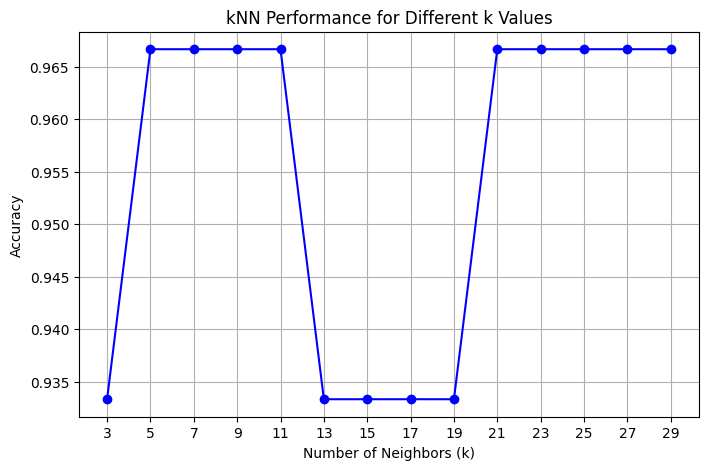

Best k: 5 with Accuracy: 0.97


In [51]:
k_values = list(range(3, 30, 2))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred_knn)
    accuracy_scores.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Performance for Different k Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f"Best k: {best_k} with Accuracy: {best_accuracy:.2f}")


1.6. Compare the performance of the above model based on metrics accuracy,
precision, recall, f1 measures) using PrettyTable.

In [52]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = round(accuracy_score(y_true, y_pred), 2)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 2)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 2)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 2)
    return [model_name, accuracy, precision, recall, f1]

table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]

table.add_row(evaluate_model(y_test, y_pred_dt, "Decision Tree"))
table.add_row(evaluate_model(y_test, y_pred_log_reg, "Logistic Regression"))
table.add_row(evaluate_model(y_test, y_pred_knn, f"kNN (k={best_k})"))

print(table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-score |
+---------------------+----------+-----------+--------+----------+
|    Decision Tree    |   0.93   |    0.93   |  0.93  |   0.93   |
| Logistic Regression |   0.9    |    0.9    |  0.9   |   0.9    |
|      kNN (k=5)      |   0.97   |    0.97   |  0.97  |   0.97   |
+---------------------+----------+-----------+--------+----------+


Task 2

2.1. Split the dataset into a training set "SongsTrain" consisting of all the observations up
to and including 2009 song releases, and a testing set "SongsTest", consisting of the
2010 song releases.

In [53]:
uploaded = files.upload()

print("Files in current directory:", os.listdir())

file_name = "song.csv"

encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df1 = pd.read_csv(file_name, encoding=enc)
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue
df1.info(), df1.head()

Saving songs.csv to songs (5).csv
Files in current directory: ['songs.csv', 'songs (1).csv', 'songs (2).csv', 'songs (3).csv', 'songs (4).csv', 'songs (5).csv']


AttributeError: 'NoneType' object has no attribute 'info'

Task 3

3.1. Build a Decision Tree model

Saving spambase.csv to spambase (8).csv


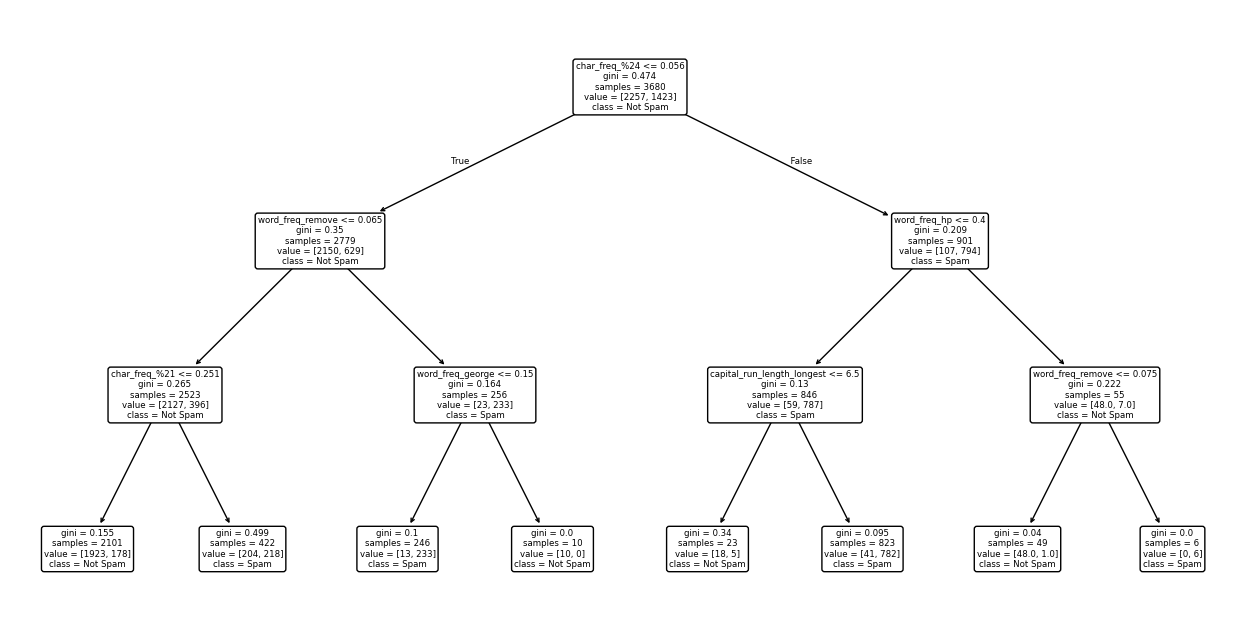

Decision Tree Accuracy (Shallow): 0.8664495114006515


In [66]:
uploaded = files.upload()
file_name = "spambase.csv"

encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df2 = pd.read_csv(file_name, encoding=enc)
        break
    except Exception:
        continue

dt_model_shallow = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_model_shallow.fit(X_train, y_train)

y_pred_dt_shallow = dt_model_shallow.predict(X_test)
dt_accuracy_shallow = accuracy_score(y_test, y_pred_dt_shallow)

plt.figure(figsize=(16, 8))
plot_tree(dt_model_shallow, feature_names=X.columns, class_names=["Not Spam", "Spam"], filled=False, rounded=True)
plt.show()
print("Decision Tree Accuracy (Shallow):", dt_accuracy_shallow)

3.2. Build a Logistic Regression model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


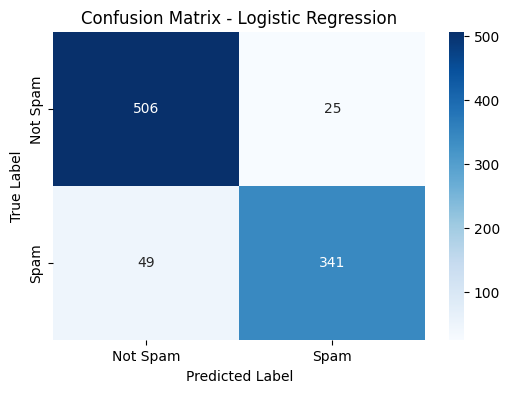

Logistic Regression Accuracy: 0.9196525515743756


In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print("Logistic Regression Accuracy:", log_reg_accuracy)

3.3. Build kNN models with k={3, 5, ..., 29}. Then, plot the performance of models with
different values of k and select the best value of k.

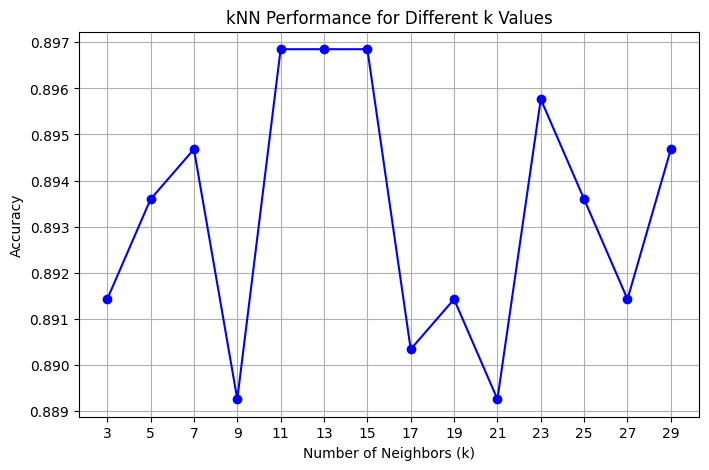

(11, 0.8968512486427795)

In [69]:
k_values = list(range(3, 30, 2))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred_knn)
    accuracy_scores.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Performance for Different k Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

best_k, best_accuracy

3.4. Compare the performance of the above model based on metrics accuracy, precision,
recall, f1 measures) using PrettyTable.

In [71]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = round(accuracy_score(y_true, y_pred), 2)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 2)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 2)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 2)
    return [model_name, accuracy, precision, recall, f1]

table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]

table.add_row(evaluate_model(y_test, y_pred_dt, "Decision Tree"))
table.add_row(evaluate_model(y_test, y_pred_log_reg, "Logistic Regression"))
table.add_row(evaluate_model(y_test, KNeighborsClassifier(n_neighbors=best_k).fit(X_train_scaled, y_train).predict(X_test_scaled), f"kNN (k={best_k})"))


print(table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-score |
+---------------------+----------+-----------+--------+----------+
|    Decision Tree    |   0.9    |    0.9    |  0.9   |   0.9    |
| Logistic Regression |   0.92   |    0.92   |  0.92  |   0.92   |
|      kNN (k=11)     |   0.9    |    0.9    |  0.9   |   0.9    |
+---------------------+----------+-----------+--------+----------+


3.5. Apply feature selection to select the best features for the output. Then, train models with
Decision Tree, Logistic Regression, and kNN algorithms.

In [76]:
X = df2.drop(columns=["class"])
y = df2["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_classif, k=20)  # Selecting the top 20 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]

selected_features.tolist()

['word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_receive',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_your',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'char_freq_%21',
 'char_freq_%24',
 'capital_run_length_longest',
 'capital_run_length_total']

In [80]:
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_model.fit(X_train_selected, y_train)
y_pred_dt = dt_model.predict(X_test_selected)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100, random_state=42)
log_reg.fit(X_train_selected_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_selected_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected_scaled, y_train)
y_pred_knn = knn.predict(X_test_selected_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

dt_accuracy, log_reg_accuracy, knn_accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


(0.9011943539630836, 0.8838219326818675, 0.9001085776330076)

In [81]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = round(accuracy_score(y_true, y_pred), 2)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 2)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 2)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 2)
    return [model_name, accuracy, precision, recall, f1]


table = PrettyTable()
table.field_names = ["Model", "Feature Selection", "Accuracy", "Precision", "Recall", "F1-score"]

table.add_row(evaluate_model(y_test, y_pred_dt, "Decision Tree") + ["No"])
table.add_row(evaluate_model(y_test, y_pred_log_reg, "Logistic Regression") + ["No"])
table.add_row(evaluate_model(y_test, y_pred_knn, f"kNN (k=5)") + ["No"])

dt_model_fs = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_model_fs.fit(X_train_selected, y_train)
y_pred_dt_fs = dt_model_fs.predict(X_test_selected)

log_reg_fs = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100, random_state=42)
log_reg_fs.fit(X_train_selected_scaled, y_train)
y_pred_log_reg_fs = log_reg_fs.predict(X_test_selected_scaled)

knn_fs = KNeighborsClassifier(n_neighbors=5)
knn_fs.fit(X_train_selected_scaled, y_train)
y_pred_knn_fs = knn_fs.predict(X_test_selected_scaled)

table.add_row(evaluate_model(y_test, y_pred_dt_fs, "Decision Tree") + ["Yes"])
table.add_row(evaluate_model(y_test, y_pred_log_reg_fs, "Logistic Regression") + ["Yes"])
table.add_row(evaluate_model(y_test, y_pred_knn_fs, f"kNN (k=5)") + ["Yes"])

print(table)

+---------------------+-------------------+----------+-----------+--------+----------+
|        Model        | Feature Selection | Accuracy | Precision | Recall | F1-score |
+---------------------+-------------------+----------+-----------+--------+----------+
|    Decision Tree    |        0.9        |   0.9    |    0.9    |  0.9   |    No    |
| Logistic Regression |        0.88       |   0.89   |    0.88   |  0.88  |    No    |
|      kNN (k=5)      |        0.9        |   0.9    |    0.9    |  0.9   |    No    |
|    Decision Tree    |        0.9        |   0.9    |    0.9    |  0.9   |   Yes    |
| Logistic Regression |        0.88       |   0.89   |    0.88   |  0.88  |   Yes    |
|      kNN (k=5)      |        0.9        |   0.9    |    0.9    |  0.9   |   Yes    |
+---------------------+-------------------+----------+-----------+--------+----------+


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
